### Classical Monte Carlo

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets

#### Target Function

$\qquad I = \int^6_0 exp(-x/2) \mathrm{d}x$

In [2]:
a,b = 0,6
def func(x):
    return np.exp(-0.5*x)

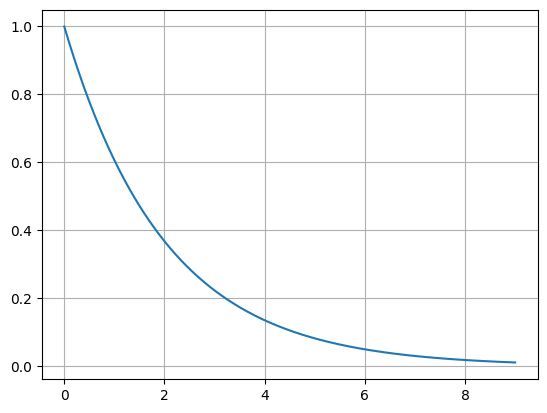

In [3]:
X = np.linspace(0,9,10000)
Y = func(X)

fig = plt.figure()
plt.plot(X,Y)
plt.grid()
plt.show()

#### Regular Integration

In [4]:
I_true,err = sp.integrate.quad(func,a,b)
I_true,err

(1.900425863264272, 2.1098965499891342e-14)

#### Linearly Spaced Integration

In [5]:
def linearSpaceIntegration(n_points,f = func,a = a,b = b):
    n_points = int(n_points)
    step_size = (b-a)/n_points
    X = np.linspace(a,b,n_points)
    Y = f(X) * step_size
    return np.sum(Y),X

1.9004271122010385


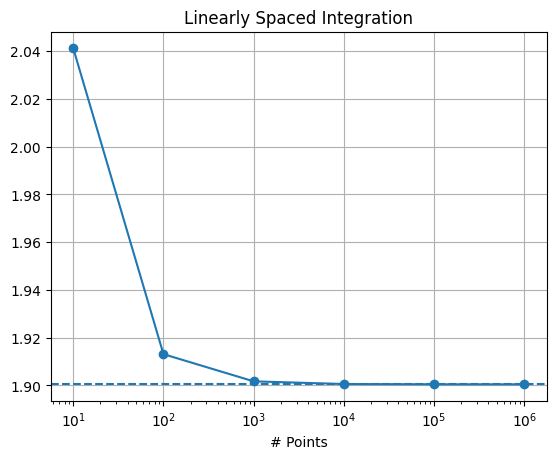

In [6]:
fig = plt.figure()

N = 6
X = np.logspace(1,N,N)
I_linear = []

for n in X:
    I_linear.append(linearSpaceIntegration(n)[0])

plt.semilogx(X,I_linear,marker = 'o')

plt.axhline(I_true,ls = "--")
plt.grid()
plt.title("Linearly Spaced Integration")
plt.xlabel("# Points")
print(I_linear[-1])
plt.show()

#### Random Distribution Integration

In [7]:
def randomSpaceIntegration(n_points,f = func,a = a,b = b,seed = 123):
    rng = np.random.default_rng(seed)

    n_points = int(n_points)
    X = rng.random(n_points)*(b-a) + a
    X.sort()
    Y = f(X[1:])*(X[1:] - X[:-1])
    return np.sum(Y),n_points

1.9004101259963277


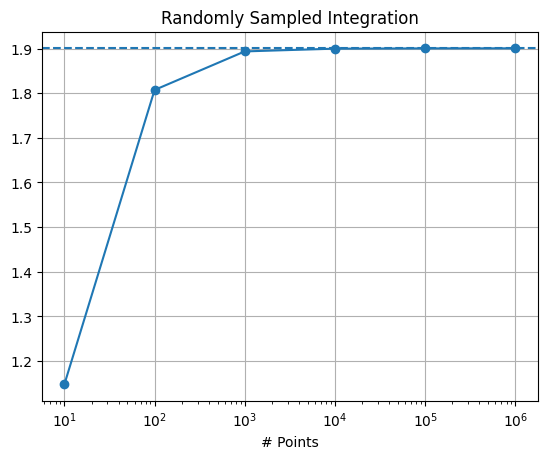

In [8]:
fig = plt.figure()

N = 6
X = np.logspace(1,N,N)
I_random = []
for n in X:
    I_random.append(randomSpaceIntegration(n)[0])

plt.semilogx(X,I_random,marker = 'o')
plt.axhline(I_true,ls = "--")
plt.grid()
plt.title("Randomly Sampled Integration")
plt.xlabel("# Points")

print(I_random[-1])
plt.show()

#### Markov-Chain Monte Carlo

In [9]:
def generateMarkovChain1D(a,b,p,step_size,n_max = 10000,seed = 124):
    rng = np.random.default_rng(seed)
    X = [a]
    while X[-1]<b and len(X)<n_max:
        if(rng.random() < p):
            x = X[-1] + step_size
        else:
            x = X[-1] - step_size
            if(x<a):
                x = X[-1]
        X.append(x)
    return X

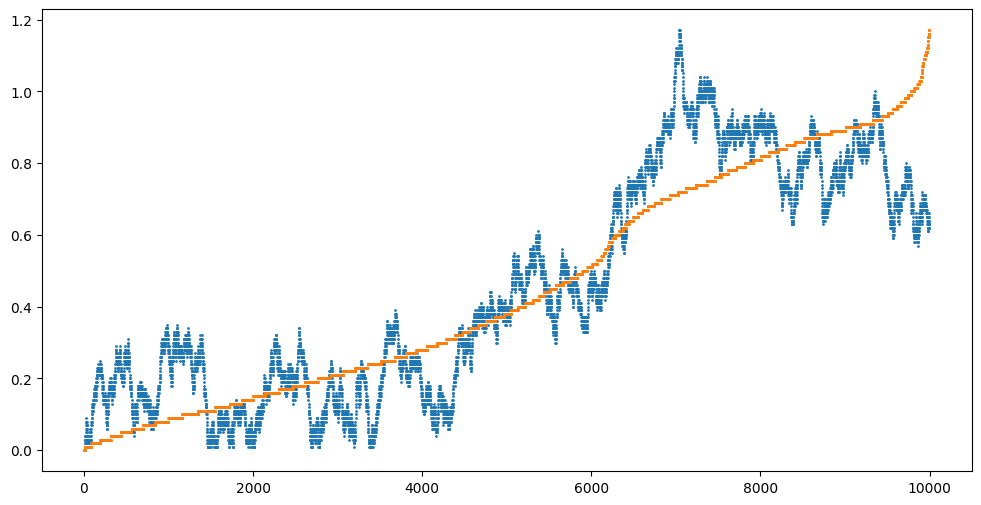

In [10]:
fig = plt.figure(figsize = (12,6))
X = generateMarkovChain1D(0,6,0.5,0.01)
plt.plot(X,ls = '',marker = 'o',ms = 1)
X_ = np.sort(X)
plt.plot(X_,ls = '',marker = 'o',ms = 1)

In [11]:
def interactive1DMarkovChain(length,p,step_size,n_max = 10000,seed = 124):
    X = generateMarkovChain1D(0,length,p,step_size,n_max = 10000,seed = 124)
    X_ = np.sort(X)
    
    fig = plt.gcf()
    plt.plot(X,lw = 0.1,marker = 'o',ms = 1)
    plt.plot(X_,ls = '',marker = 'o',ms = 1)

fig = plt.figure(figsize = (12,6))
widgets.interact(interactive1DMarkovChain,
                 length = widgets.IntSlider(6,1,10),
                 p = widgets.FloatSlider(value = 0.5,min = 0,max = 1,step = 0.05),
                 step_size = widgets.FloatLogSlider(value = 0.1, base = 10,min = -4,max = 1),
                n_max = widgets.fixed(100000),
                 seed = widgets.fixed(124))

<Figure size 1200x600 with 0 Axes>

interactive(children=(IntSlider(value=6, description='length', max=10, min=1), FloatSlider(value=0.5, descript…

<function __main__.interactive1DMarkovChain(length, p, step_size, n_max=10000, seed=124)>

In [30]:
def generateConfigurationsCOO(P,radius,res = 10):
    '''
    P : Vector for possible configurations
    radius : Maximum step
    res : Number of stepsizes in each dimension
    '''
    X = [np.linspace(p-radius,p+radius,res) for p in P]
    return np.array(np.meshgrid(*X, indexing = 'ij'))

def inBounds(x,a,b):
    '''
    Return if x is in the N-dim cube with corners a and b
    '''
    
    for xi,ai,bi in zip(x,a,b):
        if(xi < min(ai,bi) or xi>max(ai,bi)):
            return False
    return True
    
def markovChainCOO(a,b,d,inBounds,n_max = 100000,seed = 125):
    '''
    a,b : Initial and Final points
    d : Max step size
    P : Array of probabilities(for complete space)
    '''
    rng = np.random.default_rng(seed)
    x = [a]
    dims = len(a)
    
    for _ in range(n_max):
        step = (rng.random(dims)*2 - 1)*d
        x_n = x[-1] + step
        if(not inBounds(x_n,a,b)):
            x_n = x[-1]
        x.append(x_n)

    return np.array(x)


In [31]:
a,b = np.array([0,0,0]),np.array([-1,-1,-0.5]) 
d = 0.5

X = markovChainCOO(a,b,d,inBounds,n_max=1000)
X;

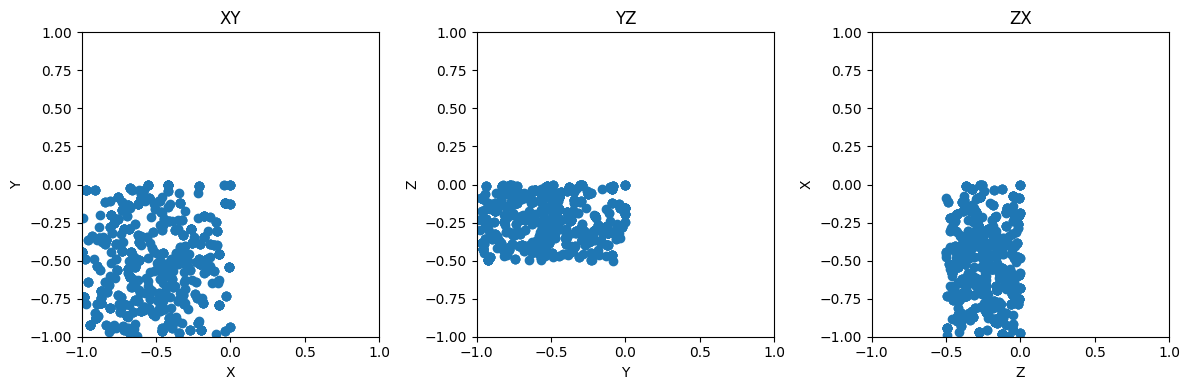

In [37]:
P = X.T

x,y,z = P[0],P[1],P[2]

fig = plt.figure(figsize=(12,4))

ax_xy = fig.add_subplot(1, 3, 1)
ax_xy.scatter(x, y)
ax_xy.set_title("XY")
ax_xy.set_xlabel("X")
ax_xy.set_ylabel("Y")
ax_xy.set_xlim(-1,1)
ax_xy.set_ylim(-1,1)

# --------------------- YZ Projection ---------------------
ax_yz = fig.add_subplot(1, 3, 2)
ax_yz.scatter(y, z)
ax_yz.set_title("YZ")
ax_yz.set_xlabel("Y")
ax_yz.set_ylabel("Z")
ax_yz.set_xlim(-1,1)
ax_yz.set_ylim(-1,1)

# --------------------- ZX Projection ---------------------
ax_zx = fig.add_subplot(1, 3, 3)
ax_zx.scatter(z, x)
ax_zx.set_title("ZX")
ax_zx.set_xlabel("Z")
ax_zx.set_ylabel("X")
ax_zx.set_xlim(-1,1)
ax_zx.set_ylim(-1,1)

plt.tight_layout()
plt.show()